In [1]:
import numpy as np
import pandas
from keras.layers import *
from keras.models import Sequential, Model
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def zeroMean(dataMat):        
    meanVal=np.mean(dataMat,axis=0)     #get mean by columns
    newData=dataMat-meanVal  
    return newData,meanVal


def percentage2n(eigVals,percentage):  
    sortArray=np.sort(eigVals)          #ascend order 
    sortArray=sortArray[-1::-1]           
    arraySum=sum(sortArray)  
    tmpSum=0  
    num=0  
    for i in sortArray:  
        tmpSum+=i  
        num+=1  
        if tmpSum>=arraySum*percentage:  
            return num  


def pca(dataMat,percentage=0.99):  
    newData,meanVal=zeroMean(dataMat)  
    covMat=np.cov(newData,rowvar=0)      #covariance  
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))      
    n=percentage2n(eigVals,percentage)                 #need n dimensionol data to get the convariance percentage
    n = 6   # pca of 2017 rookies data is 6 dimentional 
    eigValIndice=np.argsort(eigVals)            #ascend order 
    n_eigValIndice=eigValIndice[-1:-(n+1):-1]   
    n_eigVect=eigVects[:,n_eigValIndice]        
    lowDDataMat=newData*n_eigVect               #lower dimensional data  
    reconMat=(lowDDataMat*n_eigVect.T)+meanVal  #reconstruct data  
    return lowDDataMat,reconMat

In [3]:
df = pandas.read_csv("04-16_NBA_rookies_data.csv", header=None)
df1 = pandas.read_csv("04-16_NBA_rookies_label.csv",header=None)
df_test = pandas.read_csv("2017rookies_data.csv",header=None)
df1_test = pandas.read_csv("2017rookies_name.csv",header=None)
ds = df.values
ds1 = df1.values
lowDDataMat,reconMat=pca(ds)  #pca
ds_test = df_test.values
lowDDataMat1,reconMat1=pca(ds_test)  #pca
ds1_test = df1_test.values

In [4]:
x_train = lowDDataMat[:,0:6]
y_train = ds1[:,1]
x_test = lowDDataMat1[:,0:6]
y_test = ds1_test[:,0]

dim = x_train.shape[1]
model = Sequential()
model.add(Dense(100, input_dim=dim, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])

In [5]:
# Change log_dir for differnt activation function, change the number for every run.
tbCallBack = keras.callbacks.TensorBoard(log_dir='tensorboard/tanh/5', histogram_freq=0, write_graph=True, write_images=True)

In [6]:
idx = list(range(x_train.shape[0]))
np.random.shuffle(idx)
hist = model.fit(x_train[idx],y_train[idx],validation_split=0.2,epochs=85,shuffle=True, callbacks = [tbCallBack])
dnn_predict = model.predict_classes(x_test)
print(sum(dnn_predict))
print(y_test[dnn_predict == 1])

Train on 359 samples, validate on 90 samples
Epoch 1/85
359/359 [==============================] - 0s 111us/step - loss: 0.8915 - acc: 0.6267 - val_loss: 0.5826 - val_acc: 0.7556
Epoch 2/85
359/359 [==============================] - 0s 49us/step - loss: 0.6418 - acc: 0.7159 - val_loss: 0.5289 - val_acc: 0.7667
Epoch 3/85
359/359 [==============================] - 0s 61us/step - loss: 0.6576 - acc: 0.7103 - val_loss: 0.5050 - val_acc: 0.7778
Epoch 4/85
359/359 [==============================] - 0s 52us/step - loss: 0.5630 - acc: 0.7772 - val_loss: 0.4938 - val_acc: 0.7667
Epoch 5/85
359/359 [==============================] - 0s 47us/step - loss: 0.5642 - acc: 0.7772 - val_loss: 0.4465 - val_acc: 0.7667
Epoch 6/85
359/359 [==============================] - 0s 40us/step - loss: 0.4795 - acc: 0.7660 - val_loss: 0.4547 - val_acc: 0.7667
Epoch 7/85
359/359 [==============================] - 0s 40us/step - loss: 0.4547 - acc: 0.7994 - val_loss: 0.4734 - val_acc: 0.7667
Epoch 8/85
359/359 [===

Epoch 62/85
359/359 [==============================] - 0s 42us/step - loss: 0.1462 - acc: 0.9331 - val_loss: 0.2348 - val_acc: 0.8778
Epoch 63/85
359/359 [==============================] - 0s 44us/step - loss: 0.1831 - acc: 0.9220 - val_loss: 0.2110 - val_acc: 0.9000
Epoch 64/85
359/359 [==============================] - 0s 43us/step - loss: 0.1701 - acc: 0.9276 - val_loss: 0.2200 - val_acc: 0.8778
Epoch 65/85
359/359 [==============================] - 0s 43us/step - loss: 0.1450 - acc: 0.9387 - val_loss: 0.2017 - val_acc: 0.9000
Epoch 66/85
359/359 [==============================] - 0s 48us/step - loss: 0.1377 - acc: 0.9499 - val_loss: 0.2083 - val_acc: 0.9000
Epoch 67/85
359/359 [==============================] - 0s 47us/step - loss: 0.1474 - acc: 0.9443 - val_loss: 0.1905 - val_acc: 0.9000
Epoch 68/85
359/359 [==============================] - 0s 43us/step - loss: 0.1529 - acc: 0.9387 - val_loss: 0.1966 - val_acc: 0.9000
Epoch 69/85
359/359 [==============================] - 0s 43us

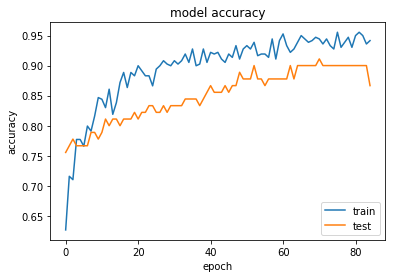

In [7]:
plt.figure(1)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'lower right')
plt.show()

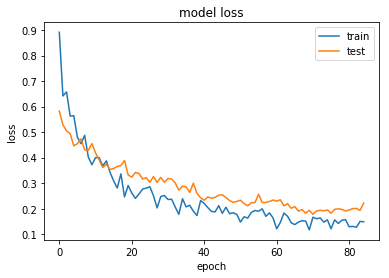

In [8]:
plt.figure(2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()